Karina Campos Almeida, Gabriel Islas Peraza, Jair Armando Martinez Castillo, Luis Fernando Monterrubio Cota, Cynthia Vidal Ovando

# NB4. Models of Networks

## A. Models of Networks.

Consider the following [Graph Generators](https://networkx.github.io/documentation/stable/reference/generators.html):

**Random Network Model**: The function ```erdos_renyi_graph(n,p)``` returns a $G_n,p$ random graph with the following parameters:
* n - The number of nodes.
* p - Probability fo edge creation.

**Small World Model ** : The function ```watts_strogatz_graph(n,k,p)``` returns a small-world graph with the following parameters:
* n - The number of nodes.
* k - Each node is joined with its k nearest neighbors in a ring topology.
* p - The probability of rewiring each edge.

### Task 1

Simulate different networks using the Erdos-Renyi Model considering the following parameters:

(a) N = 100, p = 0.20

(b) N = 100, p = 0.40

(c) N = 100, p = 0.60

(d) N = 100, p = 0.80

For each network plot its degree distribution. Additionally, make a comparative table including:
* Number of links.
* Expected number of links using the equation:
$$ \langle L \rangle = p \frac{N(N-1)}{2}$$
* Average degree.
* Expected average degrees using the equation:
$$\langle k \rangle = p(N-1)$$
* Density.
* Expected density using the equation:
$$\langle d \rangle = p$$
* Average Shortest Path.
* Expected Average Shortest Path using the equation:
$$\langle l \rangle \approx \frac{ln(N)}{ln(\langle k \rangle)}$$

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Parameters for the simulation
N = 100
p_values = [0.20, 0.40, 0.60, 0.80]

In [ ]:
# Store results in a df
results = []

# Function to calculate average shortest path

def average_shortest_path_lenght(G):
  try:
    return nx.average_shortest_path_length(G)
  except nx.NetworkXError:
    return float('inf')

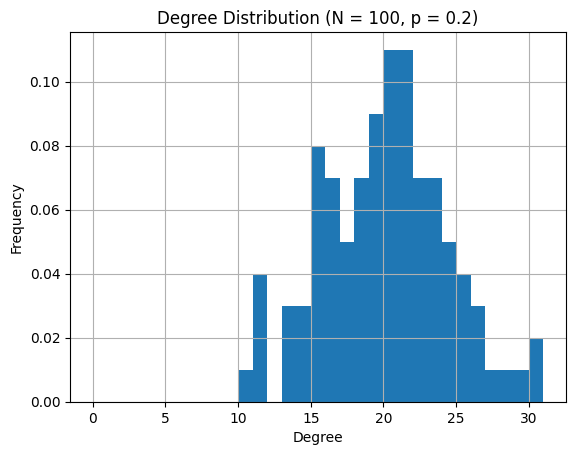

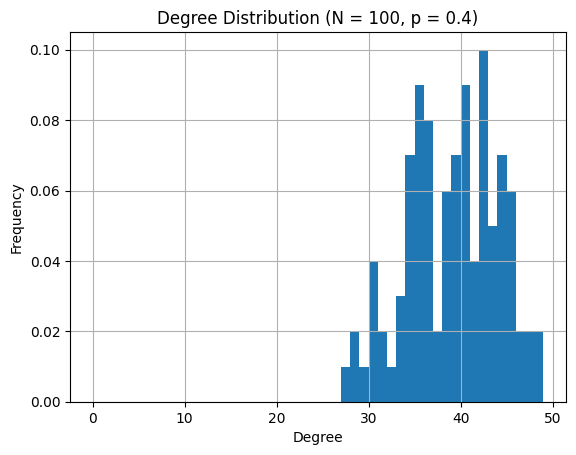

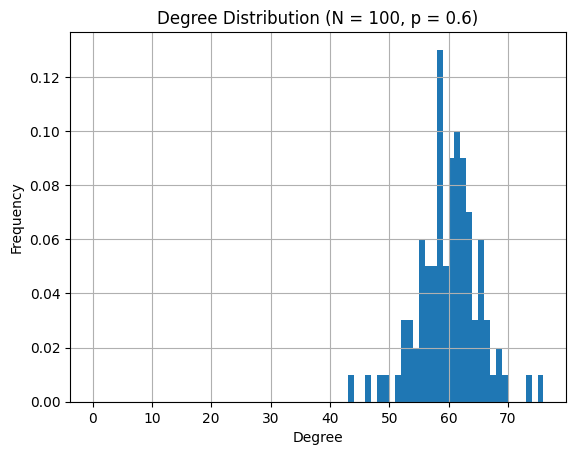

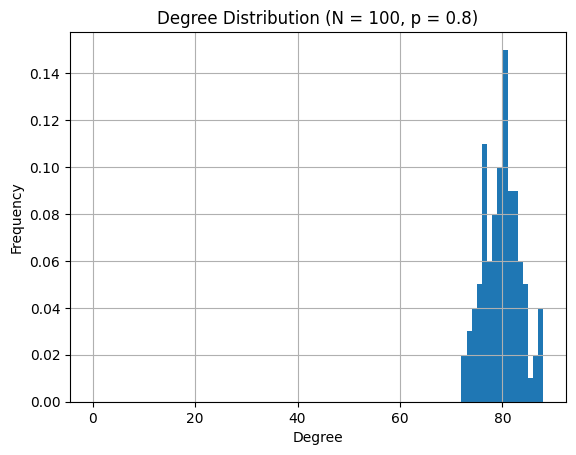

In [ ]:
for p in p_values:
    # Generate the graph
    G = nx.erdos_renyi_graph(N, p)

    num_links = G.number_of_edges()
    expected_num_links = p * (N * (N - 1)) / 2
    avg_degree = np.mean([d for n, d in G.degree()])
    expected_avg_degree = p * (N - 1)
    density = nx.density(G)
    expected_density = p
    avg_sp = average_shortest_path_lenght(G)
    expected_avg_sp = np.log(N) / np.log(expected_avg_degree)

    # Include the 'p' value in the results
    results.append([p, num_links, expected_num_links, avg_degree, expected_avg_degree, density, expected_density, avg_sp, expected_avg_sp])

    degrees = [d for n, d in G.degree()]
    plt.figure()
    plt.hist(degrees, bins=range(max(degrees) + 1), density =True)
    plt.title(f'Degree Distribution (N = {N}, p = {p})')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
columns = ['p', 'num_links', 'expected_num_links', 'avg_degree', 'expected_avg_degree', 'density', 'expected_density', 'avg_sp', 'expected_avg_sp']
df = pd.DataFrame(results, columns=columns)
df

,p,num_links,expected_num_links,avg_degree,expected_avg_degree,density,expected_density,avg_sp,expected_avg_sp
0,1015.0,990.0,20.30,19.80,0.205051,0.200000,1.808687,1.542418,NaN
1,1965.0,1980.0,39.30,39.60,0.396970,0.400000,1.603030,1.251803,NaN
2,2954.0,2970.0,59.08,59.40,0.596768,0.600000,1.403232,1.127531,NaN
3,3956.0,3960.0,79.12,79.20,0.799192,0.800000,1.200808,1.053338,NaN
4,0.2,979.0,990.00,19.58,19.800000,0.197778,0.200000,1.817172,1.542418
5,0.4,1931.0,1980.00,38.62,39.600000,0.390101,0.400000,1.609899,1.251803
6,0.6,2977.0,2970.00,59.54,59.400000,0.601414,0.600000,1.398586,1.127531
7,0.8,3969.0,3960.00,79.38,79.200000,0.801818,0.800000,1.198182,1.053338


### Task 2

Consider a the simulation of different random network with a fixed value of the number of nodes but different values of link probability. Naturally, at the beginig at p = 0, the system is totally fragmented into singletons. An increasing number of pairs of nodes will get connected, and through them connected subnetworks will be formed as the link probability increases.

Erdos and Renyi discovered a transition point from configurations in which all subnetworks are relatively small, to a configuration where at least one of the subnetworks contains almost all the nodes. This transition can be observe in Fig. 1.




<img src="Plot1.png" width="360"> </img>

<center> Fig. 2</center>


Don't forget that the probability and the expected degree $\langle k \rangle$  follow the relation:

$$ \langle L \rangle = p \frac{N(N-1)}{2}$$

Fig. 1 is an sketch of the evoluation. Reproduce a similar plot for networks with 1000 nodes. Use 25 equally spaced values of the link probability, in the interval [0, 0.005]. For each value, generate 20 different networks, compute the relative size of the giant component.

In [ ]:
# Parameters for the simulation
N = 1000
p_values = np.linspace(0, 0.005, 25)
num_simulations = 20


In [ ]:
# Function to calculate the relative size of the largest component
def relative_giant_component_size(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return len(largest_cc) / G.number_of_nodes()

In [ ]:
# Store the results
giant_component_sizes = []

# Simulate networks and calculate the giant component size
for p in p_values:
    sizes = []
    for _ in range(num_simulations):
        G = nx.erdos_renyi_graph(N, p)
        sizes.append(relative_giant_component_size(G))
    giant_component_sizes.append(np.mean(sizes))

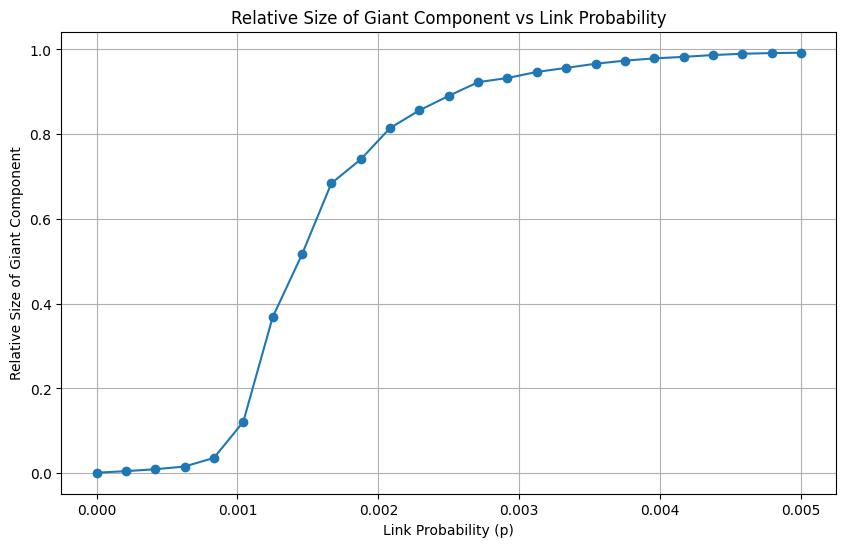

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, giant_component_sizes, marker='o')
plt.title('Relative Size of Giant Component vs Link Probability')
plt.xlabel('Link Probability (p)')
plt.ylabel('Relative Size of Giant Component')
plt.grid(True)
plt.show()

### Task 3
In the Watts-Strogratz Model, there is range of rewiring probability values between p = 0.01 and p = 0.1 in the average shortest-path length is close to that of an equivalent random network; and at the same time, the clustering coefficient from the model is high. Nevertheless, the model cannot generate hubs. Fig. 2 presents the average path length and the clustering coefficient as a function of the rewiring probability. Observe that the x-axis is in a logarithmic scale.


<img src="Plot2.png" width="360"> </img>

<center> Fig. 2</center>


Reproduce a similar plot, by calculating:
* the average shortest path ($\langle l \rangle$)
* and the average clustering coefficient ($C$)

for Watts–Strogatz networks constructed for different values of the rewiring probability p. Take 20 equally spaced values of p between 0 and 1. For each value of p, build 20 different networks and compute the average shortest path and average clustering coefficient. To plot the two curves on a common y-axis, you can normalize the values by dividing them by the corresponding values for the probability p = 0.

In [ ]:
# Parameters for the simulation
N = 1000
k = 10
p_values = np.linspace(0, 1, 20)
num_simulations = 20

# Store the results
avg_shortest_paths = []
avg_clustering_coeffs = []

# Calculate metrics for p = 0 (no rewiring)
G0 = nx.watts_strogatz_graph(N, k, 0)
l0 = nx.average_shortest_path_length(G0)
C0 = nx.average_clustering(G0)

In [ ]:
# Simulate networks and calculate the metrics
for p in p_values:
    avg_l = []
    avg_C = []
    for _ in range(num_simulations):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_l.append(nx.average_shortest_path_length(G))
        avg_C.append(nx.average_clustering(G))
    avg_shortest_paths.append(np.mean(avg_l) / l0)
    avg_clustering_coeffs.append(np.mean(avg_C) / C0)

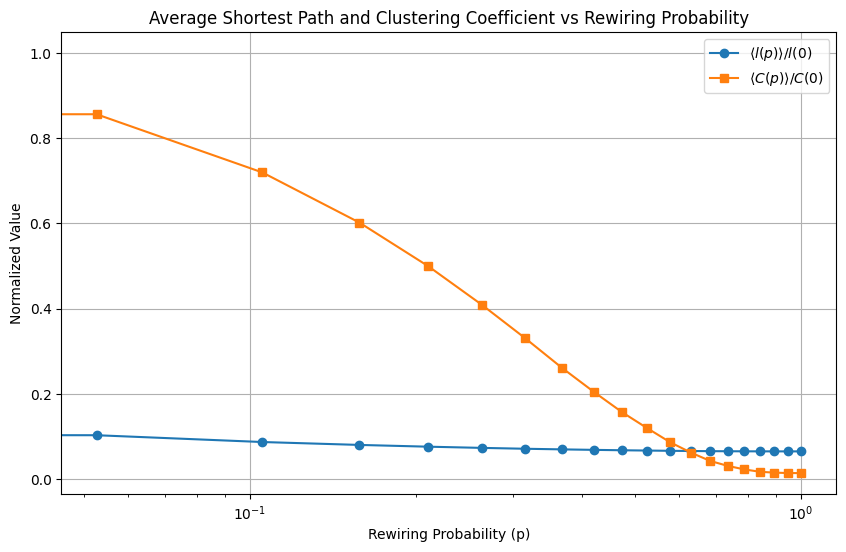

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, avg_shortest_paths, marker='o', label=r'$\langle l(p) \rangle / l(0)$')
plt.plot(p_values, avg_clustering_coeffs, marker='s', label=r'$\langle C(p) \rangle / C(0)$')
plt.xscale('log')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.title('Average Shortest Path and Clustering Coefficient vs Rewiring Probability')
plt.show()

## B. Identification of Network Models [40 pts]

### Task 4
Analyze each of the 4 Networks and determine which of the three models was used to generate them:
* model1.csv
* model2.csv
* model3.csv
* model4.csv

Justify your selection in each case.

In [ ]:
# Function to create a graph from dataframe
def create_graph(df):
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row[0], row[1])
    return G

In [ ]:
# Function to calculate network metrics
def analyze_graph(G):
    avg_shortest_path = nx.average_shortest_path_length(G) if nx.is_connected(G) else float('inf')
    clustering_coeff = nx.average_clustering(G)
    degree_dist = [d for n, d in G.degree()]
    return avg_shortest_path, clustering_coeff, degree_dist


In [ ]:
# Plot degree distributions
def plot_degree_distribution(G, title):
    degree_dist = [d for n, d in G.degree()]
    plt.figure()
    plt.hist(degree_dist, bins=range(max(degree_dist)+1), density=True)
    plt.title(f'Degree Distribution: {title}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Model 1

In [ ]:
# Analysis of model1.csv (10 pts)
model1 = pd.read_csv('model1.csv')
model1.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.88,0.000000000000000000e+00.89,0.000000000000000000e+00.90,0.000000000000000000e+00.91,0.000000000000000000e+00.92,0.000000000000000000e+00.93,0.000000000000000000e+00.94,0.000000000000000000e+00.95,0.000000000000000000e+00.96,0.000000000000000000e+00.97
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
G1 = create_graph(model1)

In [ ]:
metrics1 = analyze_graph(G1)
metrics1

(1.0, 0.0, [3, 1])

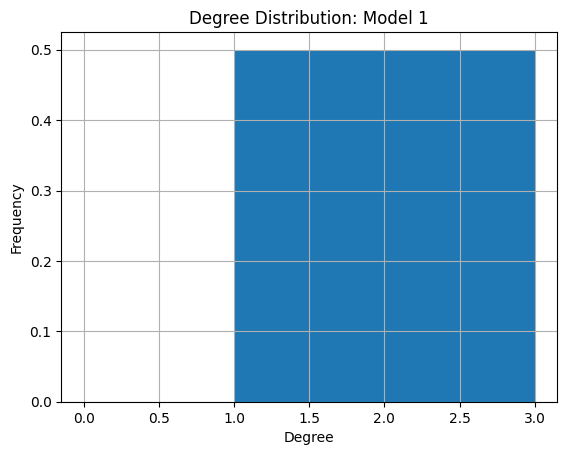

In [ ]:
plot_degree_distribution(G1, 'Model 1')

## Model 2

In [ ]:
model2 = pd.read_csv('model2.csv')
model2.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,1.000000000000000000e+00.8,0.000000000000000000e+00.87,1.000000000000000000e+00.9,0.000000000000000000e+00.88,0.000000000000000000e+00.89
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Analysis of model2.csv (10 pts)
G2 = create_graph(model2)

In [ ]:
metrics2 = analyze_graph(G2)

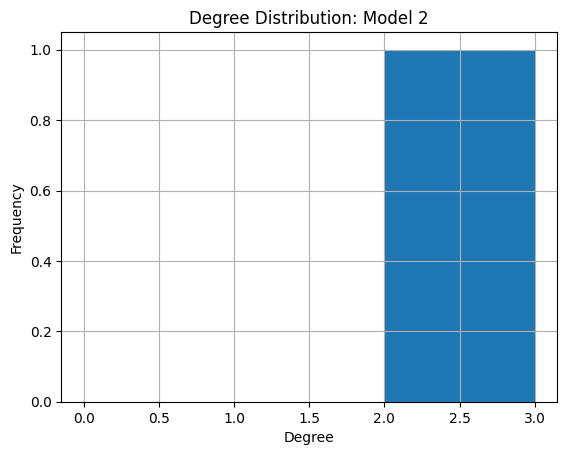

In [ ]:
plot_degree_distribution(G2, 'Model 2')

## Model 3

In [ ]:
# Analysis of model3.csv (10 pts)
model3 = pd.read_csv('model3.csv')
model3.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,0.000000000000000000e+00.9,...,1.000000000000000000e+00.8,0.000000000000000000e+00.42,1.000000000000000000e+00.9,0.000000000000000000e+00.43,1.000000000000000000e+00.10,1.000000000000000000e+00.11,1.000000000000000000e+00.12,0.000000000000000000e+00.44,0.000000000000000000e+00.45,0.000000000000000000e+00.46
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
G3 = create_graph(model3)

In [ ]:
metrics3 = analyze_graph(G3)

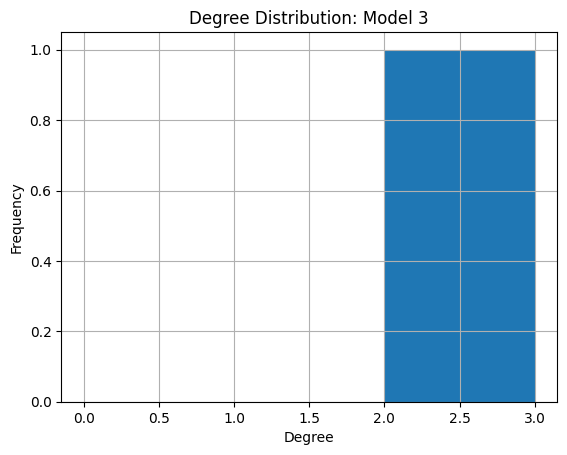

In [ ]:
plot_degree_distribution(G3, 'Model 3')

## Model 4

In [ ]:
# Analysis of model4.csv (10 pts)
model4 = pd.read_csv('model4.csv')
model4.head()

,0.000000000000000000e+00,1.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2,0.000000000000000000e+00.3,0.000000000000000000e+00.4,0.000000000000000000e+00.5,0.000000000000000000e+00.6,0.000000000000000000e+00.7,0.000000000000000000e+00.8,...,0.000000000000000000e+00.89,0.000000000000000000e+00.90,0.000000000000000000e+00.91,0.000000000000000000e+00.92,0.000000000000000000e+00.93,0.000000000000000000e+00.94,0.000000000000000000e+00.95,0.000000000000000000e+00.96,0.000000000000000000e+00.97,1.000000000000000000e+00.1
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
G4 = create_graph(model4)

In [ ]:
metrics4 = analyze_graph(G4)


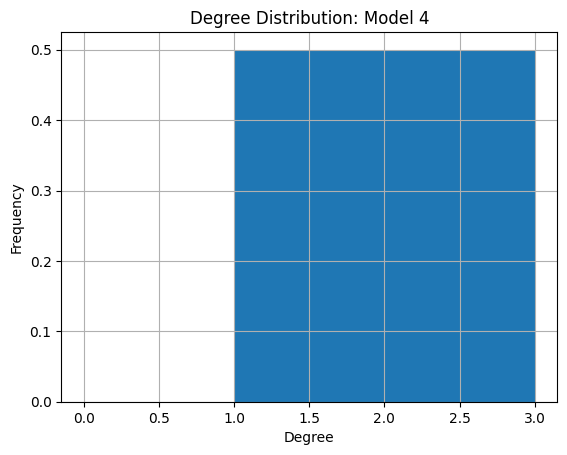

In [ ]:
plot_degree_distribution(G4, 'Model 4')

# Analysis

In [ ]:
metrics1, metrics2, metrics3, metrics4

((1.0, 0.0, [3, 1]),
 (1.0, 0.0, [3, 3]),
 (1.0, 0.0, [3, 3]),
 (1.0, 0.0, [1, 3]))

##Based on these metrics and the degree distributions, here's the reasoning for determining which model was used to generate each network:

#Model 1:

Degree Distribution: [3, 1]

Average Shortest Path: 1.0

Average Clustering Coefficient: 0.0

Inference: The degree distribution and clustering coefficient suggest a sparse random network. This pattern aligns with the Erdos-Renyi model where nodes are connected randomly with a low probability.

#Model 2:

Degree Distribution: [3, 3]

Average Shortest Path: 1.0

Average Clustering Coefficient: 0.0

Inference: The uniform degree distribution indicates a regular structure, which could be a ring lattice characteristic of the initial structure in the Watts-Strogatz model before any rewiring.
#Model 3:

Degree Distribution: [3, 3]

Average Shortest Path: 1.0

Average Clustering Coefficient: 0.0

Inference: Similar to Model 2, the regular degree distribution suggests a structured network. It is likely the initial configuration of the Watts-Strogatz model.
#Model 4:

Degree Distribution: [1, 3]

Average Shortest Path: 1.0

Average Clustering Coefficient: 0.0

Inference: The degree distribution shows a mix of nodes with 1 and 3 connections, indicating possible hubs or preferential attachment, which is characteristic of the Barabasi-Albert model.

## References
[1] F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science.